In [1]:
import kagglehub
SIZE = 128
# Download latest version
path = kagglehub.dataset_download("fareselmenshawii/face-detection-dataset")

print("Path to dataset files:", path)


c:\Users\cancathegioi\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\cancathegioi\.cache\kagglehub\datasets\fareselmenshawii\face-detection-dataset\versions\3


In [2]:
# from datasets import load_dataset

# valid_dataset = load_dataset("username/my_dataset", split="validation")

In [3]:
import glob
import cv2
images_path = path + "/images/val"
labels_path = path + "/labels/val"
images = glob.glob(images_path + "/*.jpg")
dataset = [(img, img.replace(images_path, labels_path).replace(".jpg", ".txt")) for img in images]

In [4]:
small_dataset = dataset[:200]

print(images)

['C:\\Users\\cancathegioi\\.cache\\kagglehub\\datasets\\fareselmenshawii\\face-detection-dataset\\versions\\3/images/val\\0003d5dfa8f0dd41.jpg', 'C:\\Users\\cancathegioi\\.cache\\kagglehub\\datasets\\fareselmenshawii\\face-detection-dataset\\versions\\3/images/val\\0007ad5c6245a41d.jpg', 'C:\\Users\\cancathegioi\\.cache\\kagglehub\\datasets\\fareselmenshawii\\face-detection-dataset\\versions\\3/images/val\\000cc0cd61c6c8d7.jpg', 'C:\\Users\\cancathegioi\\.cache\\kagglehub\\datasets\\fareselmenshawii\\face-detection-dataset\\versions\\3/images/val\\001ea8a8ca78a3bc.jpg', 'C:\\Users\\cancathegioi\\.cache\\kagglehub\\datasets\\fareselmenshawii\\face-detection-dataset\\versions\\3/images/val\\00430ce61009c131.jpg', 'C:\\Users\\cancathegioi\\.cache\\kagglehub\\datasets\\fareselmenshawii\\face-detection-dataset\\versions\\3/images/val\\0046c490ad699ce9.jpg', 'C:\\Users\\cancathegioi\\.cache\\kagglehub\\datasets\\fareselmenshawii\\face-detection-dataset\\versions\\3/images/val\\004a688b024288

In [5]:
def resize_image(image):
    h, w = image.shape[:2]
    if h < w:
        new_h = SIZE
        new_w = int(SIZE * w / h)
    else:
        new_h = int(SIZE * h / w)
        new_w = SIZE
    image = cv2.resize(image, (new_w, new_h))
    return image

[label_id: 0
score: 0.639416575
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.172998935
    ymin: 0.579692602
    width: 0.197779208
    height: 0.139940858
  }
  relative_keypoints {
    x: 0.234741688
    y: 0.630315483
  }
  relative_keypoints {
    x: 0.313133478
    y: 0.617189586
  }
  relative_keypoints {
    x: 0.273891211
    y: 0.651753604
  }
  relative_keypoints {
    x: 0.28882724
    y: 0.67970258
  }
  relative_keypoints {
    x: 0.220439315
    y: 0.652333081
  }
  relative_keypoints {
    x: 0.386148751
    y: 0.628961921
  }
}
]
Nose tip:
x: 0.273891211
y: 0.651753604

41 119 25 28


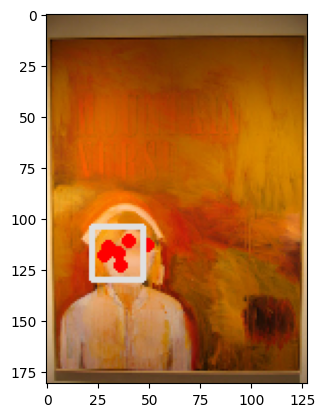

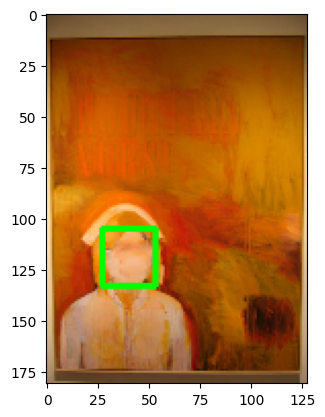

In [6]:
import mediapipe as mp
import matplotlib.pyplot as plt
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

index = 6
image = resize_image(cv2.imread(small_dataset[index][0]))

with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
    results = face_detection.process(image)
    print(results.detections)
    if results.detections:
        annotated_image = image.copy()
        for detection in results.detections:
            print('Nose tip:')
            print(mp_face_detection.get_key_point(
                detection, mp_face_detection.FaceKeyPoint.NOSE_TIP))
            mp_drawing.draw_detection(annotated_image, detection)
        
        plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
        plt.figure()
    with open(small_dataset[index][1], "r") as f:
        lines = f.readlines()
        for line in lines:
            cls, x, y, w, h = [float(i) for i in line.split()]
            x = int(x * image.shape[1])
            y = int(y * image.shape[0])
            w = int(w * image.shape[1])
            h = int(h * image.shape[0])
            print(x, y, w, h)
            cv2.rectangle(image, (x - int(h / 2), y - int(h / 2)), (x + int(w / 2), y + int(h / 2)), (0, 255, 0), 2)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [17]:
from PIL import Image
from cluster_enhancement_rgb import enhance_image
import shutil
new_small_dataset = []

for image_path, label_path in small_dataset[:200]:
    # image = cv2.imread(image_path)
    # image = resize_image(image)
    # output = enhance_image(image)
    # output.save("./test_dataset_face/images/" + image_path.split('/')[-1].split("\\")[-1])
    # shutil.copyfile(label_path, "./test_dataset_face/labels/" + label_path.split('/')[-1].split("\\")[-1])
    new_small_dataset.append(("./test_dataset_face/images/" + image_path.split('/')[-1].split("\\")[-1], "./test_dataset_face/labels/" + label_path.split('/')[-1].split("\\")[-1]))
    print(f"Image saved at: {new_small_dataset[-1]}")


Image saved at: ('./test_dataset_face/images/0003d5dfa8f0dd41.jpg', './test_dataset_face/labels/0003d5dfa8f0dd41.txt')
Image saved at: ('./test_dataset_face/images/0007ad5c6245a41d.jpg', './test_dataset_face/labels/0007ad5c6245a41d.txt')
Image saved at: ('./test_dataset_face/images/000cc0cd61c6c8d7.jpg', './test_dataset_face/labels/000cc0cd61c6c8d7.txt')
Image saved at: ('./test_dataset_face/images/001ea8a8ca78a3bc.jpg', './test_dataset_face/labels/001ea8a8ca78a3bc.txt')
Image saved at: ('./test_dataset_face/images/00430ce61009c131.jpg', './test_dataset_face/labels/00430ce61009c131.txt')
Image saved at: ('./test_dataset_face/images/0046c490ad699ce9.jpg', './test_dataset_face/labels/0046c490ad699ce9.txt')
Image saved at: ('./test_dataset_face/images/004a688b02428848.jpg', './test_dataset_face/labels/004a688b02428848.txt')
Image saved at: ('./test_dataset_face/images/005feff8c814fb4c.jpg', './test_dataset_face/labels/005feff8c814fb4c.txt')
Image saved at: ('./test_dataset_face/images/006

In [13]:
import torch
import numpy as np

def detect_face_result(dataset):
    predictions = []
    ground_truths = []
    index = 0
    for image_path, label_path in dataset:
        print(f"Processing image {index + 1}/{len(small_dataset)}, path: {image_path}")
        index += 1
        a_prediction = dict(
            boxes=[],
            scores=[],
            labels=[],
        )
        a_ground_truth = dict(
            boxes=[],
            labels=[],
        )
        image = resize_image(cv2.imread(image_path))
        image = np.array(image)
        with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
            results = face_detection.process(image)
            if results.detections:
                for face in results.detections:
                    face_box =  face.location_data.relative_bounding_box
                    box = [face_box.xmin, face_box.ymin, face_box.width, face_box.height]
                    # Convert to absolute coordinates
                    box[0] = float(box[0] * image.shape[1])
                    box[1] = float(box[1] * image.shape[0])
                    box[2] = float(box[2] * image.shape[1])
                    box[3] = float(box[3] * image.shape[0])
                    score = face.score[0]
                    label = face.label_id[0]
                    a_prediction["boxes"].append(box)
                    a_prediction["scores"].append(score)
                    a_prediction["labels"].append(label)
            with open(label_path, "r") as f:
                for line in f.readlines():
                    label = int(line.split(" ")[0])
                    box = [float(x) for x in line.split(" ")[1:]]
                    box[0] = box[0] - box[2] / 2
                    box[1] = box[1] - box[3] / 2
                    # Convert to absolute coordinates
                    box[0] = float(box[0] * image.shape[1])
                    box[1] = float(box[1] * image.shape[0])
                    box[2] = float(box[2] * image.shape[1])
                    box[3] = float(box[3] * image.shape[0])
                    a_ground_truth["boxes"].append(box)
                    a_ground_truth["labels"].append(label)

            a_prediction["boxes"] = torch.tensor(a_prediction["boxes"])
            a_prediction["scores"] = torch.tensor(a_prediction["scores"])
            a_prediction["labels"] = torch.tensor(a_prediction["labels"])
            a_ground_truth["boxes"] = torch.tensor(a_ground_truth["boxes"])
            a_ground_truth["labels"] = torch.tensor(a_ground_truth["labels"])
            predictions.append(a_prediction)
            ground_truths.append(a_ground_truth)
    return predictions, ground_truths

Processing image 1/200, path: ./test_dataset_face/images/0003d5dfa8f0dd41.jpg
Processing image 2/200, path: ./test_dataset_face/images/0007ad5c6245a41d.jpg
Processing image 3/200, path: ./test_dataset_face/images/000cc0cd61c6c8d7.jpg
Processing image 4/200, path: ./test_dataset_face/images/001ea8a8ca78a3bc.jpg
Processing image 5/200, path: ./test_dataset_face/images/00430ce61009c131.jpg
Processing image 6/200, path: ./test_dataset_face/images/0046c490ad699ce9.jpg
Processing image 7/200, path: ./test_dataset_face/images/004a688b02428848.jpg
Processing image 8/200, path: ./test_dataset_face/images/005feff8c814fb4c.jpg
Processing image 9/200, path: ./test_dataset_face/images/006f325ad71643a2.jpg
Processing image 10/200, path: ./test_dataset_face/images/00790ccfad100384.jpg
Processing image 11/200, path: ./test_dataset_face/images/007e2d0680208072.jpg
Processing image 12/200, path: ./test_dataset_face/images/0081d67c4cfc9134.jpg
Processing image 13/200, path: ./test_dataset_face/images/008

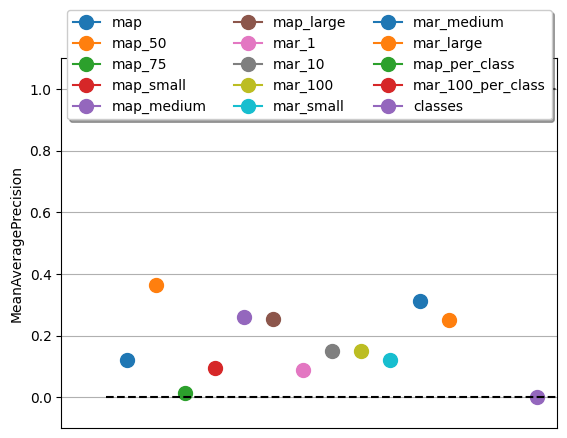

In [18]:
from torchmetrics.detection import MeanAveragePrecision
metric = MeanAveragePrecision(iou_type="bbox", box_format="xywh")

# print(predictions)
# print(ground_truths)

predictions, ground_truths = detect_face_result(new_small_dataset)
metric.update(preds=predictions, target=ground_truths)
#metric.update(preds=[predictions[1]], target=[ground_truths[1]])
result = metric.compute()

metric.plot()
print(result)

Processing image 1/200, path: C:\Users\cancathegioi\.cache\kagglehub\datasets\fareselmenshawii\face-detection-dataset\versions\3/images/val\0003d5dfa8f0dd41.jpg
Processing image 2/200, path: C:\Users\cancathegioi\.cache\kagglehub\datasets\fareselmenshawii\face-detection-dataset\versions\3/images/val\0007ad5c6245a41d.jpg
Processing image 3/200, path: C:\Users\cancathegioi\.cache\kagglehub\datasets\fareselmenshawii\face-detection-dataset\versions\3/images/val\000cc0cd61c6c8d7.jpg
Processing image 4/200, path: C:\Users\cancathegioi\.cache\kagglehub\datasets\fareselmenshawii\face-detection-dataset\versions\3/images/val\001ea8a8ca78a3bc.jpg
Processing image 5/200, path: C:\Users\cancathegioi\.cache\kagglehub\datasets\fareselmenshawii\face-detection-dataset\versions\3/images/val\00430ce61009c131.jpg
Processing image 6/200, path: C:\Users\cancathegioi\.cache\kagglehub\datasets\fareselmenshawii\face-detection-dataset\versions\3/images/val\0046c490ad699ce9.jpg
Processing image 7/200, path: C:\U

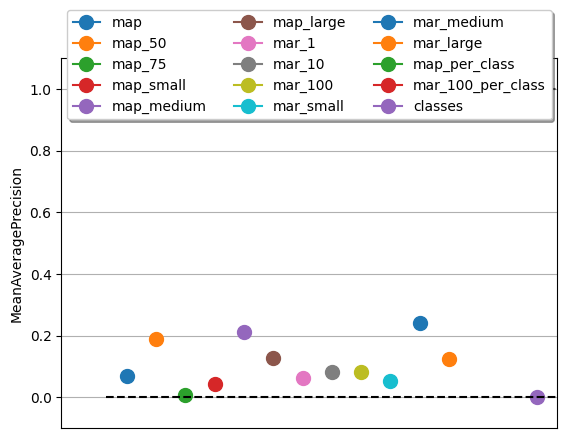

In [16]:
from torchmetrics.detection import MeanAveragePrecision
metric = MeanAveragePrecision(iou_type="bbox", box_format="xywh")

# print(predictions)
# print(ground_truths)

predictions, ground_truths = detect_face_result(small_dataset)
metric.update(preds=predictions, target=ground_truths)
#metric.update(preds=[predictions[1]], target=[ground_truths[1]])
result = metric.compute()

metric.plot()
print(result)